# 이항 분포

성공확률이 $\theta$ 인 베르누이 시도를 $N$번 하는 경우를 생각해 보자. 가장 운이 좋을 때에는 $N$번 모두 성공할 것이고 가장 운이 나쁜 경우에는 한 번도 성공하지 못할 겻이다. $N$번 중 성공한 횟수를 확률 변수 $X$ 라고 한다면 $X$의 값은 0 부터 $N$ 까지의 정수 중 하나가 될 것이다. 

이러한 확률 변수를 **이항 분포(binomial distribution)**를 따르는 확률 변수라고 하며 다음과 같이 표시한다.

$$ X \sim \text{Bin}(x;N,\theta)  $$

이항 확률 분포를 수식으로 묘사해 보자.

0 또는 1이 나오는 베르누이 확률 분포를 따르는 확률 변수 $Y$를 가정한다. 

$$ Y \sim \text{Bern}(y;\theta) $$

이 확률 변수의 $N$개의 샘플을 $y_1, y_2, \cdots, y_N$라고 하자. 이 값은 모두 0(실패) 아니면 1(성공) 이라는 값을 가지기 때문에 $N$번 중 성공한 횟수는 $N$개의 샘플 값의 총합이다.

$$ x = \sum_{i=1}^N y_i $$

이항 확률 분포를 수식으로 쓰면 다음과 같다.

$$ \text{Bin}(x;N,\theta) = \binom N x  \theta^x(1-\theta)^{N-x} $$

이 식에서 $()$ 기호와 $!$ 기호는 각각 조합(combination)과 팩토리얼(factorial)을 뜻하며 다음과 같이 정의한다.

$$ \binom N x =\dfrac{N!}{x!(N-x)!} $$

$$ N! = N\cdot (N-1) \cdots 2 \cdot 1 $$


## SciPy를 사용한 베르누이 분포의 시뮬레이션

Scipy의 stats 서브 패키지에 있는 `binom` 클래스는 이항 분포 클래스이다. `n` 인수와 `p` 인수를 사용하여 모수를 설정한다

In [18]:
N = 10
theta = 0.6
rv = sp.stats.binom(N, theta)
rv

pmf 메서드를 사용하면 확률 질량 함수(pmf: probability mass function)를 계산할 수 있다.

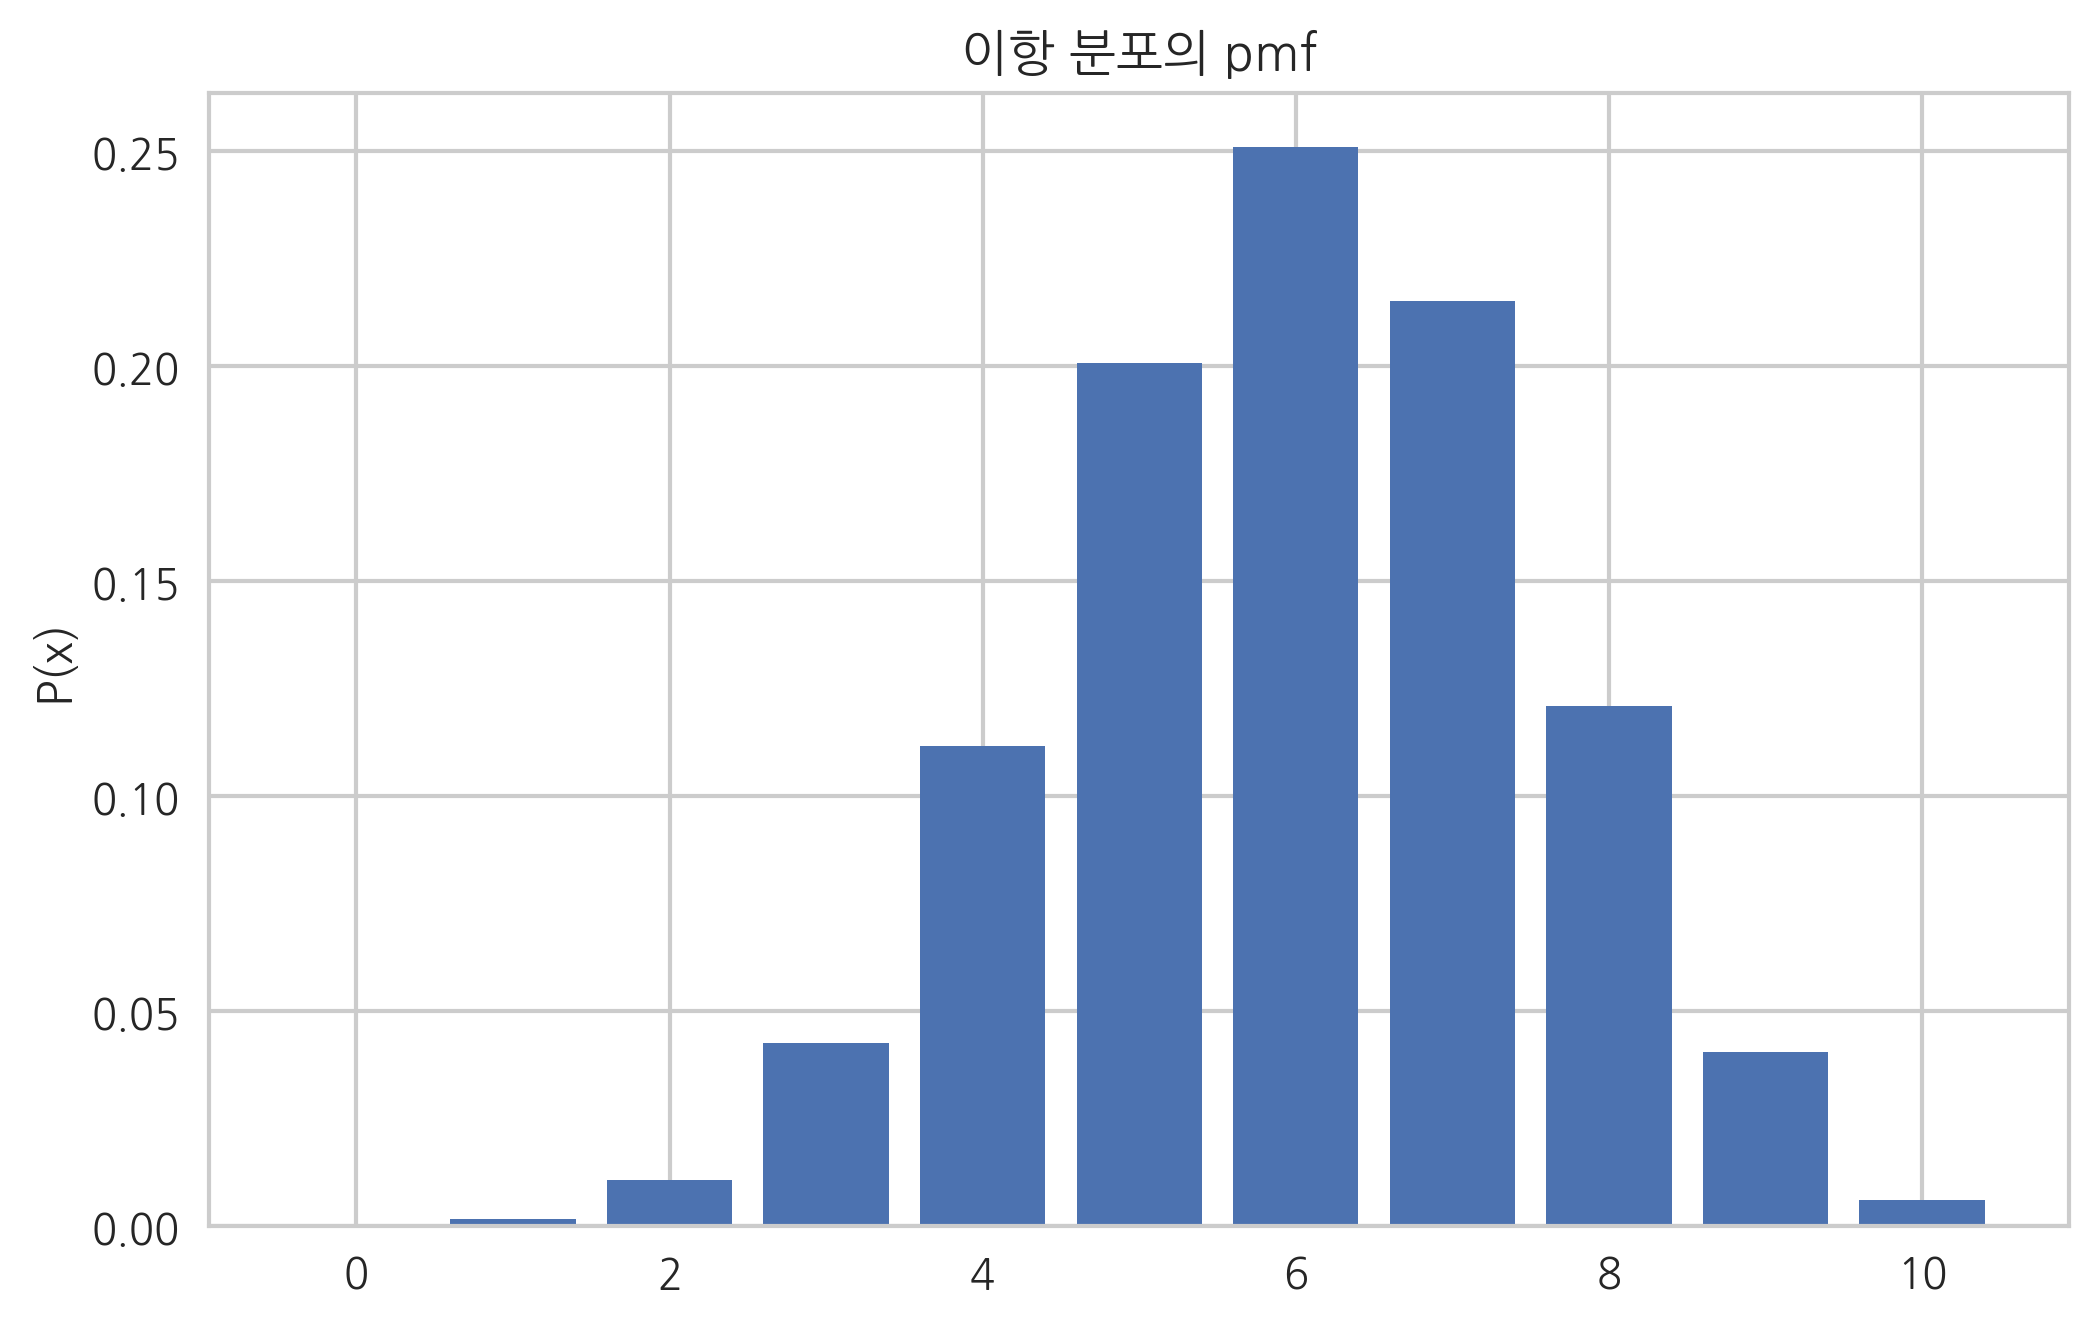

In [19]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.ylabel("P(x)")
plt.title("이항 분포의 pmf")
plt.show()

시뮬레이션을 하려면 `rvs` 메서드를 사용한다.

In [20]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

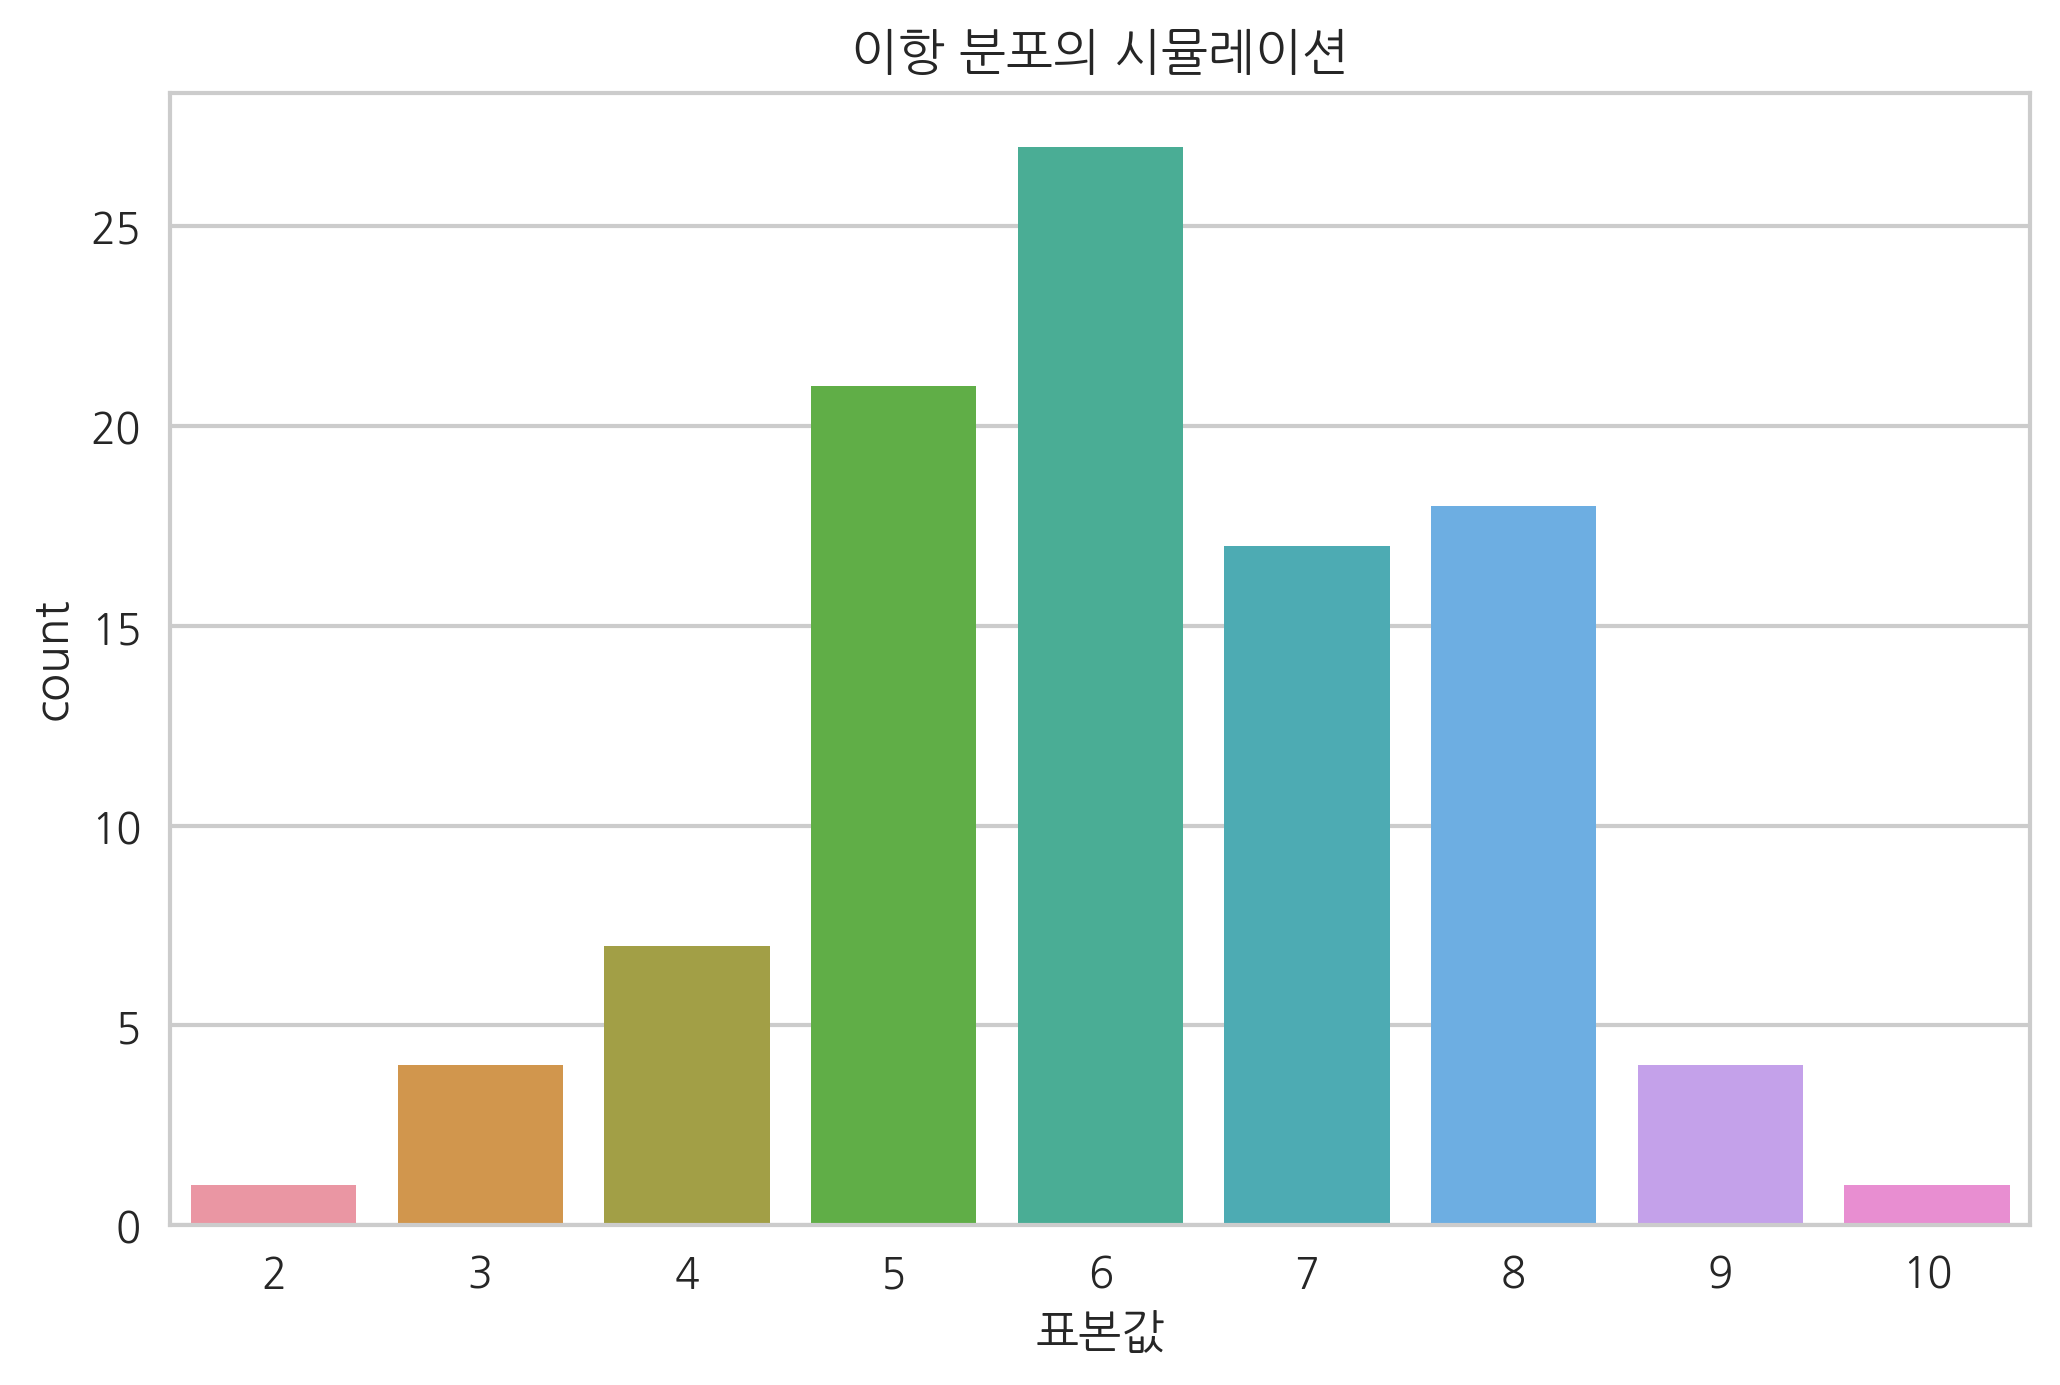

In [21]:
sns.countplot(x)
plt.title("이항 분포의 시뮬레이션")
plt.xlabel("표본값")
plt.show()

이론적인 확률 분포와 샘플의 확률 분포를 동시에 나타내려면 다음과 같은 코드를 사용한다.

In [22]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,0,시뮬레이션,0.000000
1,0,이론,0.000105
2,1,시뮬레이션,0.000000
3,1,이론,0.001573
4,2,시뮬레이션,0.010000
5,2,이론,0.010617
6,3,시뮬레이션,0.040000
7,3,이론,0.042467
8,4,시뮬레이션,0.070000
9,4,이론,0.111477


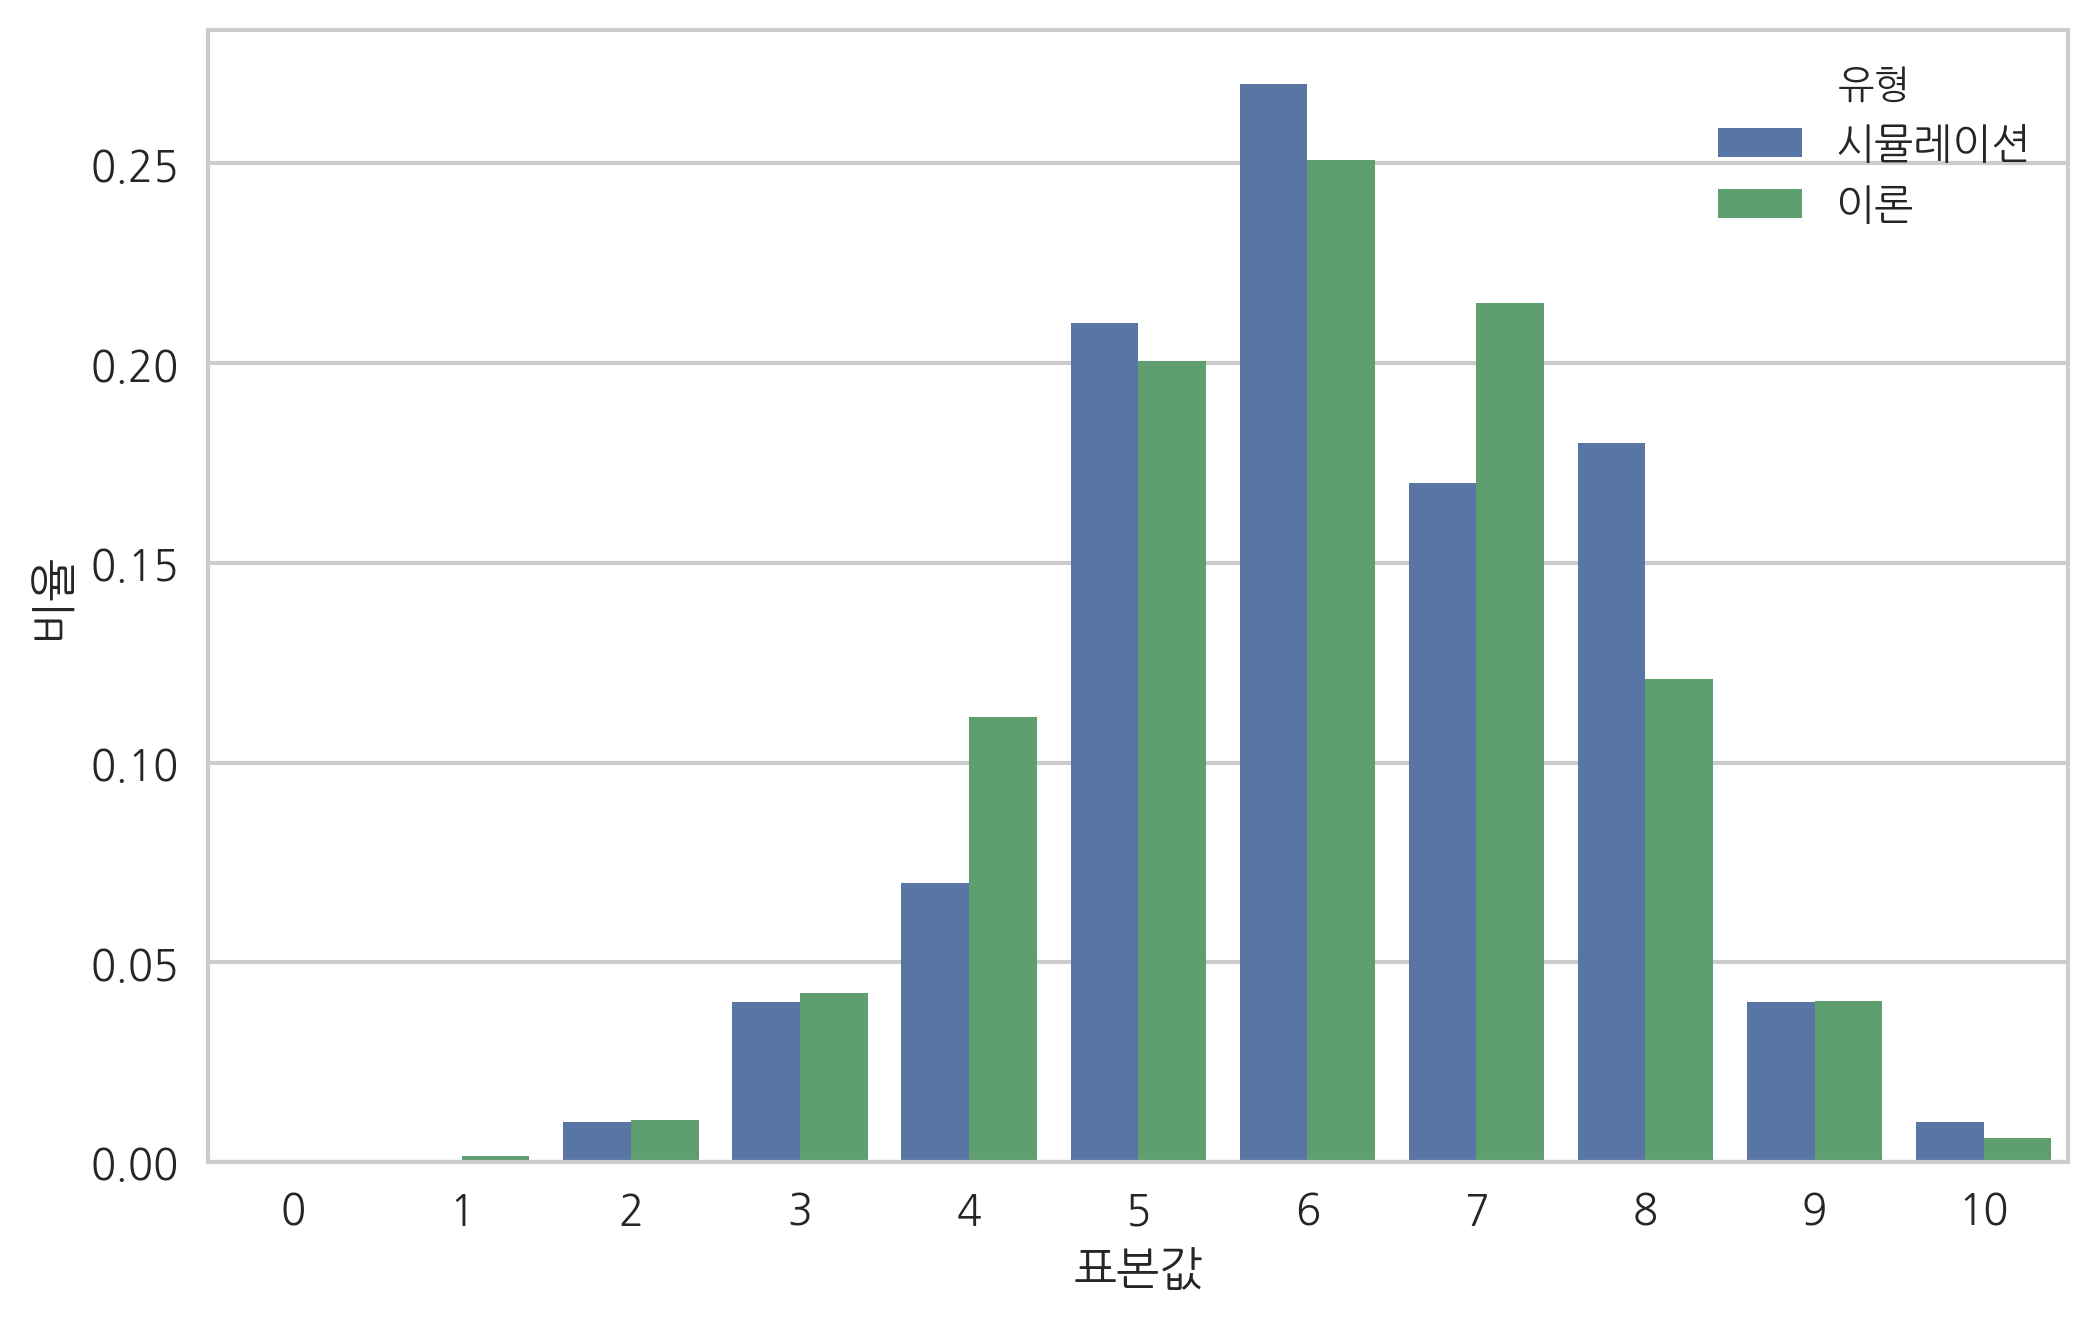

In [23]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.show()

## 이항 분포의 모멘트

이항 분포의 기댓값과 분산은 각각 다음과 같다.

### 기댓값

$$ \text{E}[X] = N\theta $$

(증명)

$$ \text{E}[X] = \text{E} \left[ \sum_{i=1}^N \text{Bern}_i \right] = \sum_{i=1}^N  \text{E}[ \text{Bern}_i ] = N\theta $$


여기에서 $\text{Bern}_i$는 $i$번째 시도의 결과로 나온 숫자로써 서로 독립인 베르누이 분포이다.

### 분산

$$ \text{Var}[X] = N\theta(1-\theta)$$

(증명)

$$ \text{Var}[X] = \text{Var} \left[ \sum_{i=1}^N \text{Bern}_i \right] = \sum_{i=1}^N  \text{Var}[ \text{Bern}_i ] = N\theta(1-\theta)$$

#### 연습 문제 1

이항 확률 분포의 모수가 다음과 같을 경우에 각각 샘플을 생성한 후 기댓값과 분산을 구하고 앞의 예제와 같이 확률 밀도 함수와 비교한 카운트 플롯을 그린다. 

샘플의 갯수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.

1. $\theta = 0.5$, $N=5$
2. $\theta = 0.9$, $N=20$